# Tarea 2

In [2]:
library(dplyr)
library(ggplot2)

## Ejercicio 1

Los siguientes datos muestran el contenido de alcohol (porcentaje) para muestras aleatorias de 7 cervezas alemanas y 8 cervezas estadounidenses. ¿Sugieren los datos que las cervezas alemanas tienen un contenido promedio de alcohol diferente al de las cervezas elaboradas en Estados Unidos? Utilice la prueba de suma de rangos de Wilcoxon con
.

Alemana: 5.00, 4.90, 3.80, 4.82, 4.80, 5.44, 6.60

Estadounidense: 4.85, 5.04, 4.20, 4.10, 4.50, 4.70, 4.30, 5.50

In [29]:
datos<- c( 5.00, 4.90, 3.80, 4.82, 4.80, 5.44, 6.60,4.85, 5.04, 4.20, 4.10, 4.50, 4.70, 4.30, 5.50)
pais <- c(rep("Alemania", 7), rep("EEUU", 8))
df <- tibble(Valores = datos, Pais = pais, Rango = rank(Valores))
df$Pais <- factor(df$Pais)
df
df_Alemania <- filter(df, Pais == "Alemania")
df_Alemania
w<- sum(df_Alemania$Rango)
w

Valores,Pais,Rango
<dbl>,<fct>,<dbl>
5.00,Alemania,11
4.90,Alemania,10
3.80,Alemania,1
4.82,Alemania,8
4.80,Alemania,7
5.44,Alemania,13
6.60,Alemania,15
4.85,EEUU,9
5.04,EEUU,12


Valores,Pais,Rango
<dbl>,<fct>,<dbl>
5.00,Alemania,11
4.90,Alemania,10
3.80,Alemania,1
4.82,Alemania,8
4.80,Alemania,7
5.44,Alemania,13
6.60,Alemania,15


[1] 65

In [34]:
p_value <- pwilcox(36, 7, 8, lower.tail = FALSE)
2*p_value

[1] 0.3356643

In [16]:
Alemania<- datos[1:7]
EEUU<- datos[8:15]
pares <- expand.grid(i = 1:length(Alemania), j=1:length(EEUU))
pares$d_ij<- Alemania[pares$i]-EEUU[pares$j]
pares_filtro<- filter(pares, d_ij>0)
pares_filtro

i,j,d_ij
<int>,<int>,<dbl>
1,1,0.15
2,1,0.05
6,1,0.59
7,1,1.75
6,2,0.40
7,2,1.56
1,3,0.80
2,3,0.70
4,3,0.62


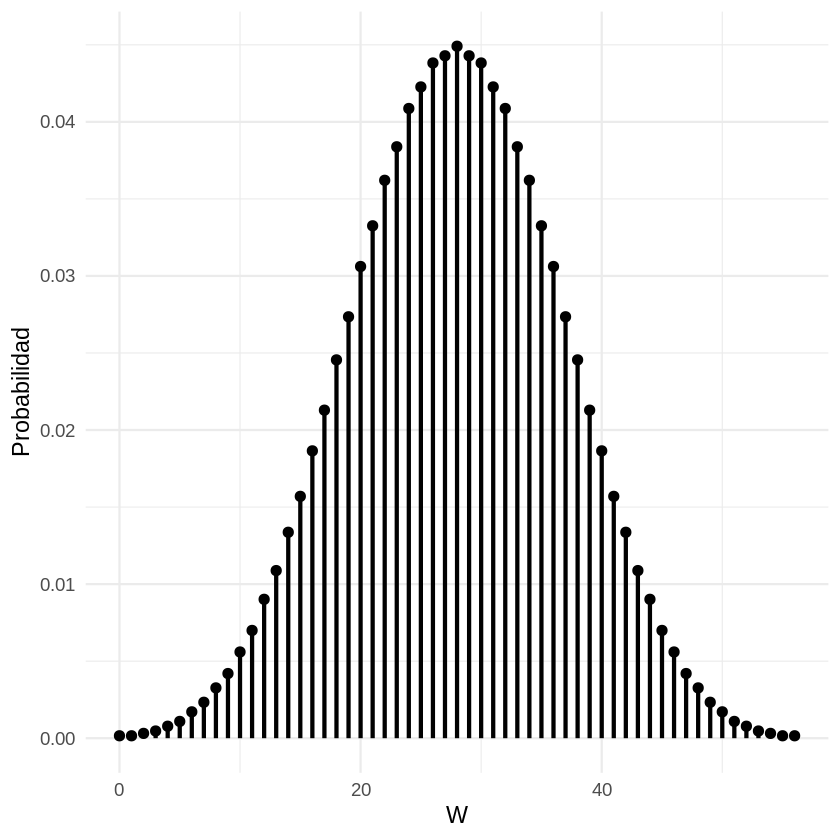

In [35]:
m <- 7
n <- 8
w_min <- m * (m+1)/2
w_max <- m*n+ m * (m+1)/2

df_graf <- tibble(w_vals = w_min:w_max,
             u_vals = w_vals - w_min,
             probs_w = dwilcox(u_vals, m, n))







ggplot(df_graf) +
  geom_segment(aes(x = u_vals, xend = u_vals, y = 0, yend = probs_w),
               linewidth = 1.2) +
  geom_point(aes(x = u_vals, y = probs_w), size = 2.5) +
  labs(x = "W",
       y = "Probabilidad") +
  #scale_x_continuous(breaks = seq(w_min, w_max, by=5))+
  theme_minimal(base_size = 14)



In [31]:
wilcox.test(Valores ~ Pais, data = df, alternative = "two.sided")


	Wilcoxon rank sum exact test

data:  Valores by Pais
W = 37, p-value = 0.3357
alternative hypothesis: true location shift is not equal to 0


## Ejercicio 3

¿Pueden los videojuegos mejorar el equilibrio en personas mayores? El artículo “The Effect of Virtual Reality Gaming on Dynamic Balance in Older Adults” (Age and Ageing, 2012: 549–552) reportó un experimento en el que 34 adultos mayores fueron asignados aleatoriamente a uno de dos grupos: (1) 16 que participaron en un régimen de ejercicios de seis semanas usando el Wii Fit Balance Board (WBB), y (2) 17 que no modificaron su actividad física diaria durante ese periodo. Los datos siguientes muestran la mejora en el tiempo de la prueba “8-foot-up-and-go” (en segundos), una prueba estándar de agilidad y equilibrio.

WBB: -1.9, -0.8, 0.1, 0.5, 0.6, 0.7, 0.8, 0.9, 1.1, 1.2, 1.5, 2.0, 2.1, 2.7, 3.2, 3.7

Control: -2.6, -2.2, -2.1, -1.4, -1.1, -0.7, -0.6, -0.3, -0.1, 0.0, 0.3, 0.4, 1.0, 1.3, 2.3, 2.4, 4.5

Prueba si la mejora promedio verdadera es mayor usando el WBB que en condiciones de control, al nivel de significancia de 0.05.

Valores,Treatment,Rango
<dbl>,<fct>,<dbl>
-1.9,WBB,4
-0.8,WBB,7
0.1,WBB,13
0.5,WBB,16
0.6,WBB,17
0.7,WBB,18
0.8,WBB,19
0.9,WBB,20
1.1,WBB,22


Valores,Treatment,Rango
<dbl>,<fct>,<dbl>
-1.9,WBB,4
-0.8,WBB,7
0.1,WBB,13
0.5,WBB,16
0.6,WBB,17
0.7,WBB,18
0.8,WBB,19
0.9,WBB,20
1.1,WBB,22


[1] 330

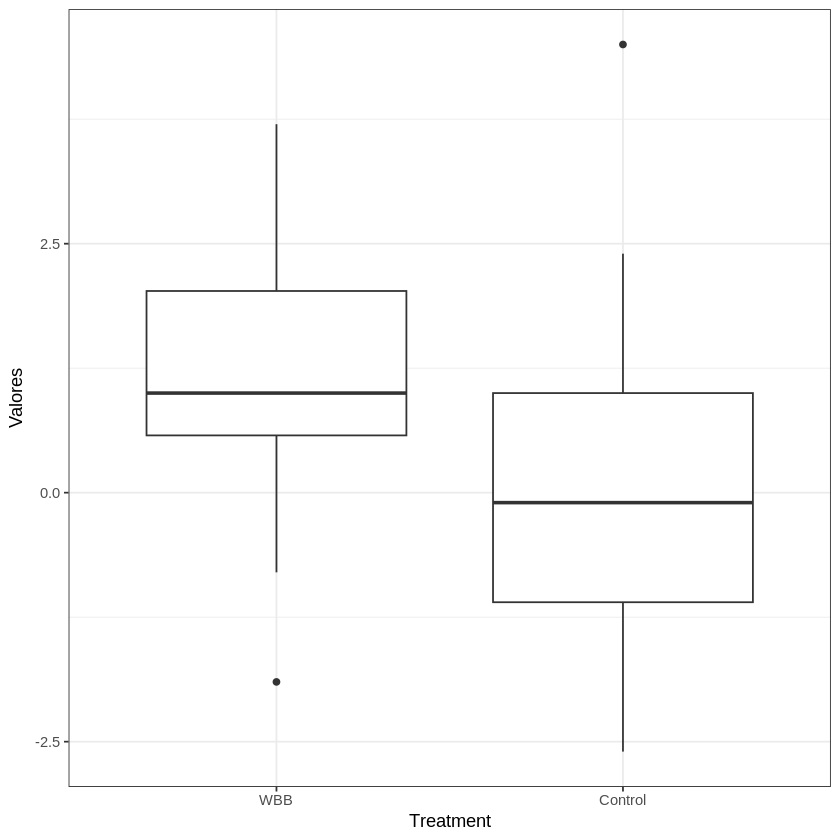

In [45]:
datos<- c(-1.9, -0.8, 0.1, 0.5, 0.6, 0.7, 0.8, 0.9, 1.1, 1.2, 1.5, 2.0, 2.1, 2.7, 3.2, 3.7, -2.6, -2.2, -2.1, -1.4, -1.1, -0.7, -0.6, -0.3, -0.1, 0.0, 0.3, 0.4, 1.0, 1.3, 2.3, 2.4, 4.5)
Tratamiento <- c(rep("WBB", 16), rep("Control", 17))
df <- tibble(Valores = datos, Treatment = Tratamiento , Rango = rank(Valores))
df$Treatment <- factor(df$Treatment, levels = c("WBB", "Control"))
df
df_filtro <- filter(df, Tratamiento == "WBB")
df_filtro
w<- sum(df_filtro$Rango)
w



ggplot(df)+
  geom_boxplot(aes(Treatment, Valores))+
  theme_bw()

In [46]:
m<- 16
u<-w- m*(m+1)/2
u

[1] 194

In [47]:
p_value<- pwilcox(193, 16, 17, lower.tail = FALSE)
p_value

[1] 0.01855166

In [48]:
wilcox.test(Valores ~ Treatment, data = df, alternative = "greater")


	Wilcoxon rank sum exact test

data:  Valores by Treatment
W = 194, p-value = 0.01855
alternative hypothesis: true location shift is greater than 0
